<a href="https://colab.research.google.com/github/nareshmargana/AI-ML-INTERNSHIP/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/mcdonalds.csv')

In [ ]:
df.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


<Axes: title={'center': 'distribution of yummy'}, xlabel='Age'>

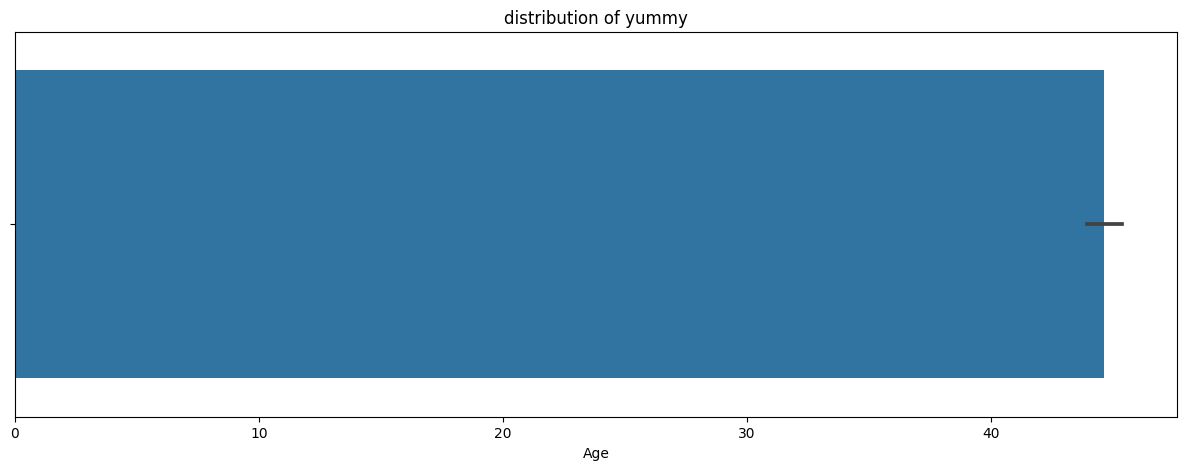

In [ ]:
import seaborn as sns
plt.figure(figsize=(15,5))
plt.title('distribution of yummy')
sns.barplot(x='Age',data=df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


In [ ]:
df.shape

(1453, 15)

In [ ]:
#check NaN Values
df.isna().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [ ]:
df.Age.describe([.75,.90,.95,.99])

count    1453.000000
mean       44.604955
std        14.221178
min        18.000000
50%        45.000000
75%        57.000000
90%        63.000000
95%        66.000000
99%        70.000000
max        71.000000
Name: Age, dtype: float64

<ipython-input-18-34b028f839f5>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'])


<Axes: title={'center': 'distribution of Age'}, xlabel='Age', ylabel='Density'>

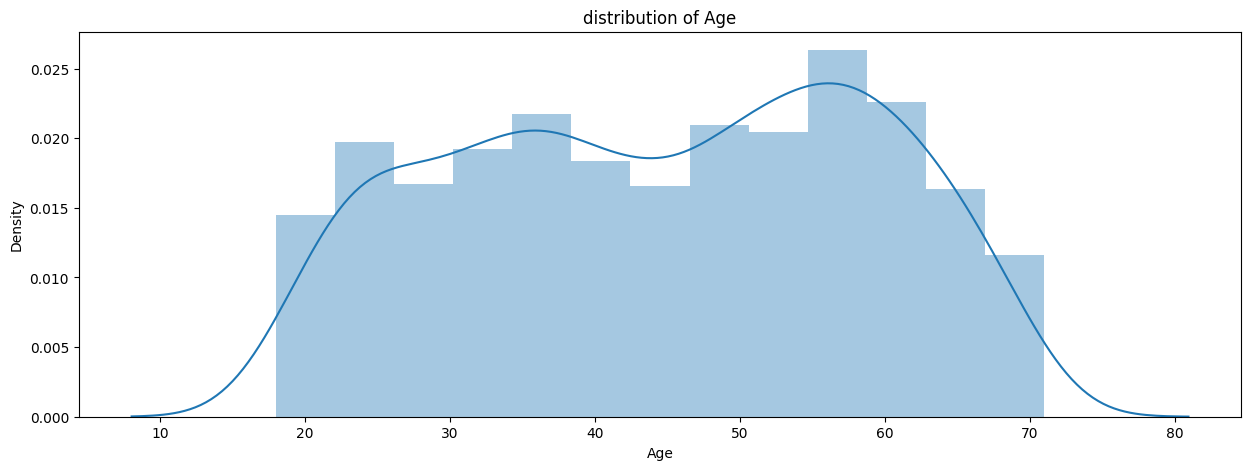

In [ ]:
#distribution of Age
plt.figure(figsize=(15,5))
plt.title("distribution of Age")
sns.distplot(df['Age'])

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["yummy"]=le.fit_transform(df["yummy"])
df["convenient"]=le.fit_transform(df["convenient"])
df["spicy"]=le.fit_transform(df["spicy"])
df["fattening"]=le.fit_transform(df["fattening"])
df["greasy"]=le.fit_transform(df["greasy"])
df["fast"]=le.fit_transform(df["fast"])
df["cheap"]=le.fit_transform(df["cheap"])
df["tasty"]=le.fit_transform(df["tasty"])
df["expensive"]=le.fit_transform(df["expensive"])
df["healthy"]=le.fit_transform(df["healthy"])
df["disgusting"]=le.fit_transform(df["disgusting"])
df["Like"]=le.fit_transform(df["Like"])
df["Age"]=le.fit_transform(df["Age"])
df["VisitFrequency"]=le.fit_transform(df["VisitFrequency"])
df["Gender"]=le.fit_transform(df["Gender"])

In [ ]:
df.shape

(1453, 15)

In [ ]:
df.columns

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender'],
      dtype='object')

In [ ]:
# columns to keep:
data= df[['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'expensive', 'healthy', 'disgusting', 'Like', 'Age',
       'VisitFrequency', 'Gender']].rename({'Gender':'label'},axis=1)

In [ ]:
df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,1,0,0,6,43,0,0
1,1,1,0,1,1,1,1,1,1,0,0,1,33,0,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = data.iloc[:, data.columns != 'label']
y = data.iloc[:, data.columns == 'label']

In [ ]:
# split the data into test and train by maintaing same distribution of output variable 'y_true'[stratify=y_true]
X_train, test_df, y_train, y_test = train_test_split(X, y, stratify=y,test_size=0.2)
# split the train data into train and cross calidation by maintaining same distrubution of output varaible 'y_train'[stratify=y_true]
train_df, cv_df, ytrain, y_cv = train_test_split(X_train, y_train,stratify=y_train, test_size=0.2)

In [ ]:
print('Number of data points in train data:', train_df.shape[0])
print('Number of data points in test data:', test_df.shape[0])
print('Number of data points in cross validation data:',df.shape[0])

Number of data points in train data: 929
Number of data points in test data: 291
Number of data points in cross validation data: 1453


In [ ]:
test_df.head(2)

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency
1350,1,1,0,1,0,1,1,1,0,1,0,2,10,3
1383,0,1,0,0,0,1,1,0,0,0,0,3,37,4


In [ ]:
y_test.head(2)

,label
1350,0
1383,1


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn = KNeighborsClassifier()

In [ ]:
knn.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [ ]:
kYPred = knn.predict(X_train)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [ ]:
print(classification_report(y_train,kYPred))

              precision    recall  f1-score   support

           0       0.68      0.78      0.73       630
           1       0.69      0.57      0.62       532

    accuracy                           0.68      1162
   macro avg       0.68      0.68      0.68      1162
weighted avg       0.68      0.68      0.68      1162



In [ ]:
confusion_matrix(y_train,kYPred)

array([[492, 138],
       [229, 303]])

In [ ]:
import pickle

In [ ]:
pickle.dump(knn,open('knnmodel','wb'))